# 로지스틱 회귀분석(Logistic Regression)

- 선형회귀분석과 유사하지만 종속변수가 양적척도가 아닌 질적척도임
    - 특성 수치를 예측하는 것이 아니라 어떤 카테고리에 들어갈지 분류하는 모델
    
- 기본 모형은 종속변수가 0과 1이라는 이항(binary)로 이루어져 구매/미구매, 성공/실패, 합격/불합격 등을 예측

- 만약 종속변수의 범주가 3개 이상일 경우에는 다항 로지스틱 회귀분석(Multinomial Logisitc Regression)을 통해 분류 예측을 할 수 있음

- 로지스틱 회귀는 기존의 선형회귀식의 사상은 그대로 유지하되 종속변수를 1이될 확률로 변환하여 그 확률에 따라 0과 1의 여부를 예측

- 선형회귀선은 이항으로 이루어진 종속변수를 직선으로 표현하여 확률이 양과 음의 무한대로 뻗어나가게 됨
    - 이러한 방식은 확률을 표현하기에 적합하지 않기 때문에 0과 1사이의 S자 곡선의 형태를 갖도록 변환해줘야 함
    
- 선형 회귀선을 로짓 회귀선으로 변환하기 위해서는 오즈값을 구해야 함
    - 오즈(Odds) : 사건이 발생할 가능성이 발생하지 않을 가능성보다 어느 정도 큰 지를 나타내는 값
        - $$ \frac{p}{1-p} $$
        - 분모는 사건이 발생하지 않을 확률, 분자는 사건이 발생할 확률로 하여 사건이 발생하지 않을 확률 대비 사건이 발생할 확률을 비율로 나타냄
        - 즉, 발생할 확률이 그렇지 않을 확률과 50:50 으로 같으면 1.0, 두 배면 2.0, 다섯 배면 5.0이 됨
        - 만약 발생확률이 60%이고 발생하지 않을 확률이 40%라면 발생확률이 1.5배 높기 때문에 오즈는 1.5가 됨
    - 하지만 직선 형태의 회귀 값을 사건이 일어날 오즈 값으로 변환하게 되면 발생확률이 1에 가까워질수록 오즈값은 기하급수적으로 커지고 최솟값은 0이 되는 균형잡히지 않은 형태가 됨

<img src = "./image/odds.png">

- 따라서 오즈 값에 로그를 취하면 양의 무한대에서 음의 무한대를 갖는 형태가 됨
    - $$ \log\left(\frac{p}{1-p}\right) $$

- 하지만 여전히 0에서 1사이의 범위를 나타내지 못하는 문제가 있음
    - 따라서 확률을 로짓 변환하여 0에서 1사이로 치환
    - 이 변환식을 시그모이드(Sigmoid)함수라고 함
    - $$ \frac{1}{1 + e^{-x}} $$
        - 시그모이드 함수 적용 과정
            1. $$ \sigma\left(\log\left(\frac{p}{1-p}\right)\right) = \frac{1}{1 + e^{-\log\left(\frac{p}{1-p}\right)}} $$
            2. $$ e^{-\log\left(\frac{p}{1-p}\right)} = \frac{1}{e^{\log\left(\frac{p}{1-p}\right)}} = \frac{1}{\frac{p}{1-p}} $$
            3. $$ \frac{1}{1 + \frac{1-p}{p}} $$
            4. $$ \frac{1}{\frac{p + 1 - p}{p}} = \frac{p}{1} = p $$

- 이렇게 로지스틱 회귀분석은 사건 발생 확률을 0에서 1사이로 변환해서 표현
    - 이러한 분류 모델은 카테고리를 분류하는 임계치를 어떻게 설정하는지가 중요
        - 기본적으로 분류 기준값은 0.5
        - 주제에 따라 달라질 수 있음
    - 최적의 효율을 따져가며 분류 기준을 잡아야하기 때문에, 로지스틱 회귀 모델과 같은 분류 모델은 모델 성능평가가 매우 중요

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/heart_2020_cleaned.csv")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
# 명목형 변수 더미 처리
df2 = pd.get_dummies(df, columns = ["HeartDisease", "Smoking", "AlcoholDrinking",
                                   "Stroke", "DiffWalking", "Sex", "AgeCategory",
                                   "Race", "Diabetic", "PhysicalActivity", "GenHealth", "Asthma", "KidneyDisease", "SkinCancer"],
                    drop_first = True, dtype = "int64")

In [6]:
df2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,3.0,30.0,5.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,20.34,0.0,0.0,7.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,26.58,20.0,30.0,8.0,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,24.21,0.0,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,23.71,28.0,0.0,8.0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [7]:
# RobustScaler 적용

# 숫자형 변수 분리
df_num = df[["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]]
df_nom = df2.drop(["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"], axis = 1)

In [8]:
# 숫자형 변수 RobustScaler 적용
rs = RobustScaler()
df_robust = rs.fit_transform(df_num)

In [9]:
# 컬럼명 결합
df_num2 = pd.DataFrame(data = df_robust, columns = df_num.columns)

In [10]:
df_num2.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-1.453315,1.5,10.0,-1.0
1,-0.947226,0.0,0.0,0.0
2,-0.102842,10.0,10.0,0.5
3,-0.423545,0.0,0.0,-0.5
4,-0.491204,14.0,0.0,0.5


In [11]:
df_num.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [12]:
df_num2.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.133342,1.685855,1.299455,0.048537
std,0.860095,3.975425,2.651745,0.718004
min,-2.073072,0.000000,0.000000,-3.000000
25%,-0.447903,0.000000,0.000000,-0.500000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.552097,1.000000,1.000000,0.500000
max,9.135318,15.000000,10.000000,8.500000


In [13]:
# 숫자형 테이블과 더미화 문자형 테이블 결합
df3 = pd.concat([df_num2, df_nom], axis = 1)

In [14]:
df3.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-1.453315,1.5,10.0,-1.0,0,1,0,0,0,0,...,1,0,1,0,0,0,1,1,0,1
1,-0.947226,0.0,0.0,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,-0.102842,10.0,10.0,0.5,0,1,0,0,0,1,...,1,0,1,1,0,0,0,1,0,0
3,-0.423545,0.0,0.0,-0.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,-0.491204,14.0,0.0,0.5,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [15]:
# 독립변수와 종속변수 분리
x = df3.drop(["HeartDisease_Yes"], axis = 1)
y = df3[["HeartDisease_Yes"]]

In [16]:
# 데이터 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, random_state = 11)

In [17]:
len(x_train), len(x_test)

(239846, 79949)

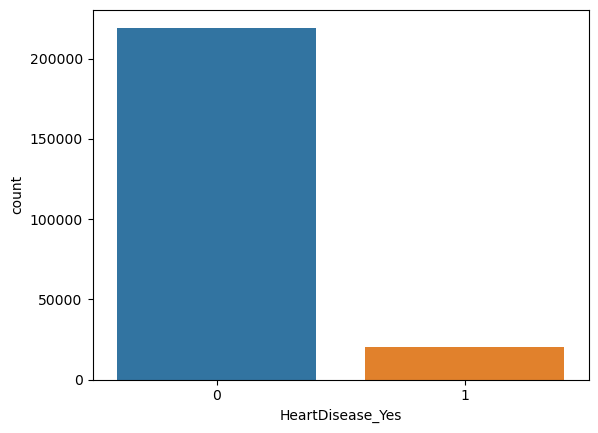

In [18]:
# 종속변수 클래스 분포 시각화
sns.countplot(x = "HeartDisease_Yes", data = y_train)
plt.show()

In [19]:
y_train.value_counts()

HeartDisease_Yes
0                   219316
1                    20530
Name: count, dtype: int64

- 클래스 불균형이 심한 상황
    - 언더샘플링이나 오버샘플링을 적용하여 클래스 균형을 맞춰줘야 함

In [20]:
# 임시 변수명 적용
x_train_re = x_train.copy()
y_train_re = y_train.copy()

x_tmp_name = [f"X{i}" for i in range(1, 38)]
y_tmp_name = ["y1"]

In [21]:
x_tmp_name

['X1',
 'X2',
 'X3',
 'X4',
 'X5',
 'X6',
 'X7',
 'X8',
 'X9',
 'X10',
 'X11',
 'X12',
 'X13',
 'X14',
 'X15',
 'X16',
 'X17',
 'X18',
 'X19',
 'X20',
 'X21',
 'X22',
 'X23',
 'X24',
 'X25',
 'X26',
 'X27',
 'X28',
 'X29',
 'X30',
 'X31',
 'X32',
 'X33',
 'X34',
 'X35',
 'X36',
 'X37']

In [22]:
x_train_re.columns = x_tmp_name
y_train_re.columns = y_tmp_name

In [23]:
x_train_re.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37
32027,0.161028,15.0,5.000000,-0.5,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
265805,1.094723,1.0,0.333333,0.5,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
80845,0.377537,0.0,0.000000,-1.0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
189874,-0.208390,0.0,0.000000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
130666,0.115020,0.0,0.333333,-1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


- 기존 변수명은 언더샘플링이나 오버샘플링 적용 시 오류가 발생하기 때문에 임시 변수명을 부여

In [24]:
# 언더샘플링 적용
x_train_under , y_train_under = RandomUnderSampler(random_state = 11).fit_resample(x_train_re, y_train_re)

In [25]:
print("랜덤샘플러 적용 전", x_train_re.shape, y_train_re.shape)
print("랜덤샘플러 적용 후", x_train_under.shape, y_train_under.shape)

랜덤샘플러 적용 전 (239846, 37) (239846, 1)
랜덤샘플러 적용 후 (41060, 37) (41060, 1)


In [26]:
y_train_under.value_counts()

y1
0     20530
1     20530
Name: count, dtype: int64

- 클래스 불균형 문제를 해결하기 위해 언더샘플링을 적용
- 적용 후 20530 : 20530 으로 동일한 비율로 변경됨

In [27]:
# 컬럼명 복구
x_train_under.columns = list(x_train)
y_train_under.columns = list(y_train)

In [28]:
x_train_under.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,...,Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,-0.612991,0.0,0.0,0.5,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
1,-1.262517,0.0,0.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.303112,15.0,0.0,0.5,1,1,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
3,0.806495,0.0,10.0,0.0,1,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
4,-0.120433,0.0,0.0,0.0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0


In [29]:
# 학습셋 모델 학습
logi = LogisticRegression()
logi.fit(x_train_under, y_train_under)

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print(logi.score(x_train_under, y_train_under))
print(logi.score(x_test, y_test))

0.7645640526059425
0.7513039562721234


In [31]:
y_train_under.astype("int64")

,HeartDisease_Yes
0,0
1,0
2,0
3,0
4,0
...,...
41055,1
41056,1
41057,1
41058,1


In [32]:
# 로지스틱 모델 통계모델로 학습
model = sm.Logit(y_train_under.astype("int64"), x_train_under)
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.503896
         Iterations 7


In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       HeartDisease_Yes   No. Observations:                41060
Model:                          Logit   Df Residuals:                    41023
Method:                           MLE   Df Model:                           36
Date:                Wed, 27 Mar 2024   Pseudo R-squ.:                  0.2730
Time:                        16:46:20   Log-Likelihood:                -20690.
converged:                       True   LL-Null:                       -28461.
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
BMI                                  0.0826      0.015      5.444      0.000       0.053       0.112
PhysicalHealth                       0.0135      0.003      3.996      0.000       0.007       0.020
MentalHealth                         0.0082      0.005      1.680      0.093      -0.001       0.018
SleepTime                           -0.0576      0.016     -3.643      0.000      -0.089      -0.027
Smoking_Yes                          0.3642      0.025     14.575      0.000       0.315       0.413
AlcoholDrinking_Yes                 -0.2944      0.053     -5.522      0.000      -0.399      -0.190
Stroke_Yes                           1.1829      0.053     22.471      0.000       1.080       1.286
DiffWalking_Yes                      0.2351      0.035      6.767      0.000       0.167       0.303
Sex_Male                             0.6644      0.025     26.400      0.000       0.615       0.714
AgeCategory_25-29                   -1.3518      0.123    -10.969      0.000      -1.593      -1.110
AgeCategory_30-34                   -0.9034      0.105     -8.566      0.000      -1.110      -0.697
AgeCategory_35-39                   -0.8132      0.097     -8.426      0.000      -1.002      -0.624
AgeCategory_40-44                   -0.4083      0.089     -4.608      0.000      -0.582      -0.235
AgeCategory_45-49                   -0.2145      0.083     -2.580      0.010      -0.377      -0.052
AgeCategory_50-54                    0.3009      0.076      3.974      0.000       0.153       0.449
AgeCategory_55-59                    0.5670      0.072      7.897      0.000       0.426       0.708
AgeCategory_60-64                    0.8006      0.070     11.434      0.000       0.663       0.938
AgeCategory_65-69                    1.0563      0.069     15.223      0.000       0.920       1.192
AgeCategory_70-74                    1.4054      0.070     20.092      0.000       1.268       1.542
AgeCategory_75-79                    1.5905      0.073     21.884      0.000       1.448       1.733
AgeCategory_80 or older              1.9054      0.072     26.484      0.000       1.764       2.046
Race_Asian                          -2.8440      0.119    -23.837      0.000      -3.078      -2.610
Race_Black                          -2.4704      0.082    -30.151      0.000      -2.631      -2.310
Race_Hispanic                       -2.3547      0.080    -29.306      0.000      -2.512      -2.197
Race_Other                          -2.3173      0.095    -24.508      0.000      -2.503      -2.132
Race_White                          -2.2473      0.070    -32.258      0.000      -2.384      -2.111
Diabetic_No, borderline diabetes     0.0462      0.074      0.623      0.533      -0.099       0.192
Diabetic_Yes                         0.4899      0.032     15.127      0.000       0.426       0.553
Diabetic_Yes (during pregnancy)     -0.0082      0.162     -0.051      0.959      -0.326       0.309
PhysicalA

In [35]:
# 오즈비 확인
np.exp(results.params)

BMI                                 1.086152
PhysicalHealth                      1.013560
MentalHealth                        1.008252
SleepTime                           0.944031
Smoking_Yes                         1.439324
AlcoholDrinking_Yes                 0.744971
Stroke_Yes                          3.263919
DiffWalking_Yes                     1.265061
Sex_Male                            1.943252
AgeCategory_25-29                   0.258770
AgeCategory_30-34                   0.405202
AgeCategory_35-39                   0.443436
AgeCategory_40-44                   0.664776
AgeCategory_45-49                   0.806918
AgeCategory_50-54                   1.351130
AgeCategory_55-59                   1.762957
AgeCategory_60-64                   2.226767
AgeCategory_65-69                   2.875853
AgeCategory_70-74                   4.077073
AgeCategory_75-79                   4.906070
AgeCategory_80 or older             6.721918
Race_Asian                          0.058190
Race_Black

- 독립변수가 종속변수인 심장병 여부 확률에 어떤 영향을 미치는지 확인하기 위해 오즈비를 산출
    - 해당 독립변수가 1일 때 심장병 발생 확률이 몇 배 더 큰지를 나타냄
    - 예) Smoking_Yes 변수의 오즈비는 1.4이기 때문에 흡연자는 비흡연자보다 심장병 발생 확률이 1.4배 높다